<a href="https://colab.research.google.com/github/noelmt7/LAB1_ML/blob/main/2345838_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler


In [4]:
churn = pd.read_csv('/content/Churn_Modelling - Churn_Modelling.csv')

In [5]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
churn = churn.drop(columns = 'RowNumber', axis = 1)

In [9]:
churn = churn.drop(columns = 'Surname', axis = 1)

In [10]:
churn = churn.drop(columns = 'Geography', axis = 1)

In [11]:
churn.isnull().sum()

CustomerId         0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


**Removing Outliers from Columns "Credit Score" and "Number of Products"**

In [12]:
numeric_cols = churn.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
a=churn[numeric_cols].apply(zscore)
a

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


<Axes: >

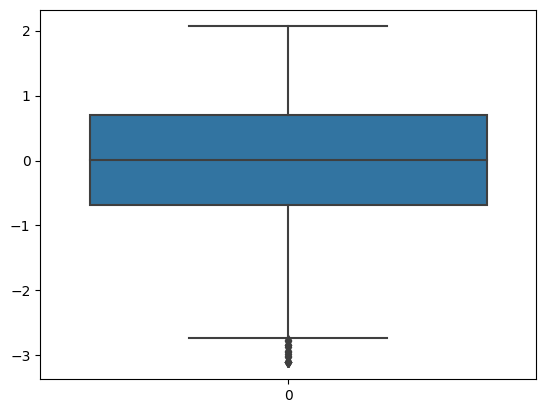

In [14]:
sns.boxplot(a['CreditScore'])

In [15]:
print(np.where(a['CreditScore']<-3))

(array([1405, 1631, 1838, 1962, 2473, 8723, 8762, 9624]),)


**FINDING OUTLIERS USING INTER QUARTILE RANGE**

In [16]:
Q1 = np.percentile(a['CreditScore'], 25, method='midpoint')
Q3 = np.percentile(a['CreditScore'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1.3864679452730182


In [17]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(a['CreditScore']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(a['CreditScore']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())


Upper Bound: 2.7778112912610555
0
Lower Bound: -2.768060489831017
16


In [18]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(a['CreditScore']>=upper)[0]
lower_array = np.where(a['CreditScore']<=lower)[0]

# Removing the outliers
a.drop(index=upper_array, inplace=True)
a.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", a.shape)

New Shape:  (9984, 10)


In [19]:
print("Old Shape", churn.shape)

Old Shape (10000, 11)


In [20]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9984 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9984 non-null   float64
 1   CreditScore      9984 non-null   float64
 2   Age              9984 non-null   float64
 3   Tenure           9984 non-null   float64
 4   Balance          9984 non-null   float64
 5   NumOfProducts    9984 non-null   float64
 6   HasCrCard        9984 non-null   float64
 7   IsActiveMember   9984 non-null   float64
 8   EstimatedSalary  9984 non-null   float64
 9   Exited           9984 non-null   float64
dtypes: float64(10)
memory usage: 858.0 KB


<Axes: >

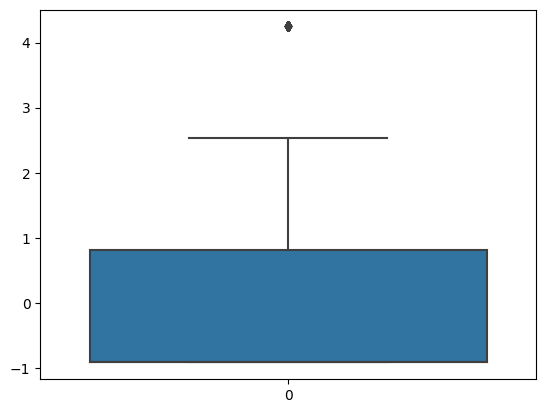

In [21]:
sns.boxplot(a['NumOfProducts'])

In [22]:
Q1 = np.percentile(a['NumOfProducts'], 25, method='midpoint')
Q3 = np.percentile(a['NumOfProducts'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1.7193200566581983


In [23]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(a['NumOfProducts']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(a['NumOfProducts']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())


Upper Bound: 3.3867166476053194
59
Lower Bound: -3.4905635790274743
0


In [24]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(a['NumOfProducts']>=upper)[0]
lower_array = np.where(a['NumOfProducts']<=lower)[0]

# Removing the outliers
a.drop(index=upper_array, inplace=True)
a.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", a.shape)

New Shape:  (9925, 10)


In [25]:
print("Old Shape", churn.shape)

Old Shape (10000, 11)


**Finding Outliers using Z-Score**

In [26]:
numeric_cols = churn.select_dtypes(include=[np.number])

zscore_df = numeric_cols.apply(zscore)


outlier_mask = (zscore_df > 3) | (zscore_df < -3)


outlier_rows = np.any(outlier_mask, axis=1)

cleaned_df = churn[~outlier_rows]


print(cleaned_df)


      CustomerId  CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
0       15634602          619  Female   42       2       0.00              1   
1       15647311          608  Female   41       1   83807.86              1   
2       15619304          502  Female   42       8  159660.80              3   
3       15701354          699  Female   39       1       0.00              2   
4       15737888          850  Female   43       2  125510.82              1   
...          ...          ...     ...  ...     ...        ...            ...   
9995    15606229          771    Male   39       5       0.00              2   
9996    15569892          516    Male   35      10   57369.61              1   
9997    15584532          709  Female   36       7       0.00              1   
9998    15682355          772    Male   42       3   75075.31              2   
9999    15628319          792  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  Estima

***EDA***

<ipython-input-27-5b25ceceafb5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_df.corr()


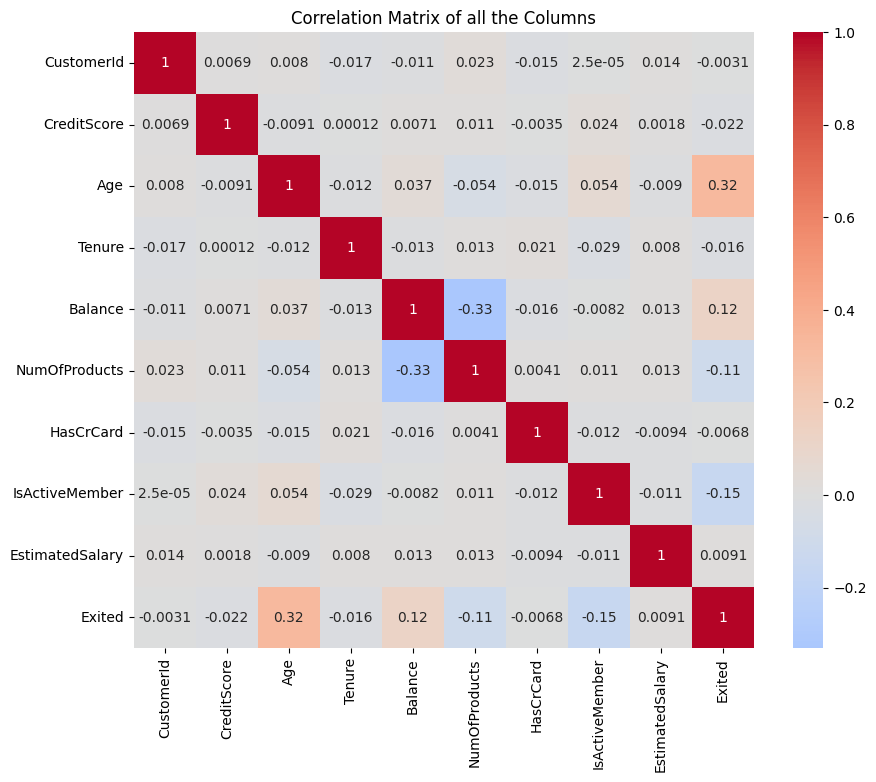

In [27]:
correlation_matrix = cleaned_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of all the Columns')
plt.show()


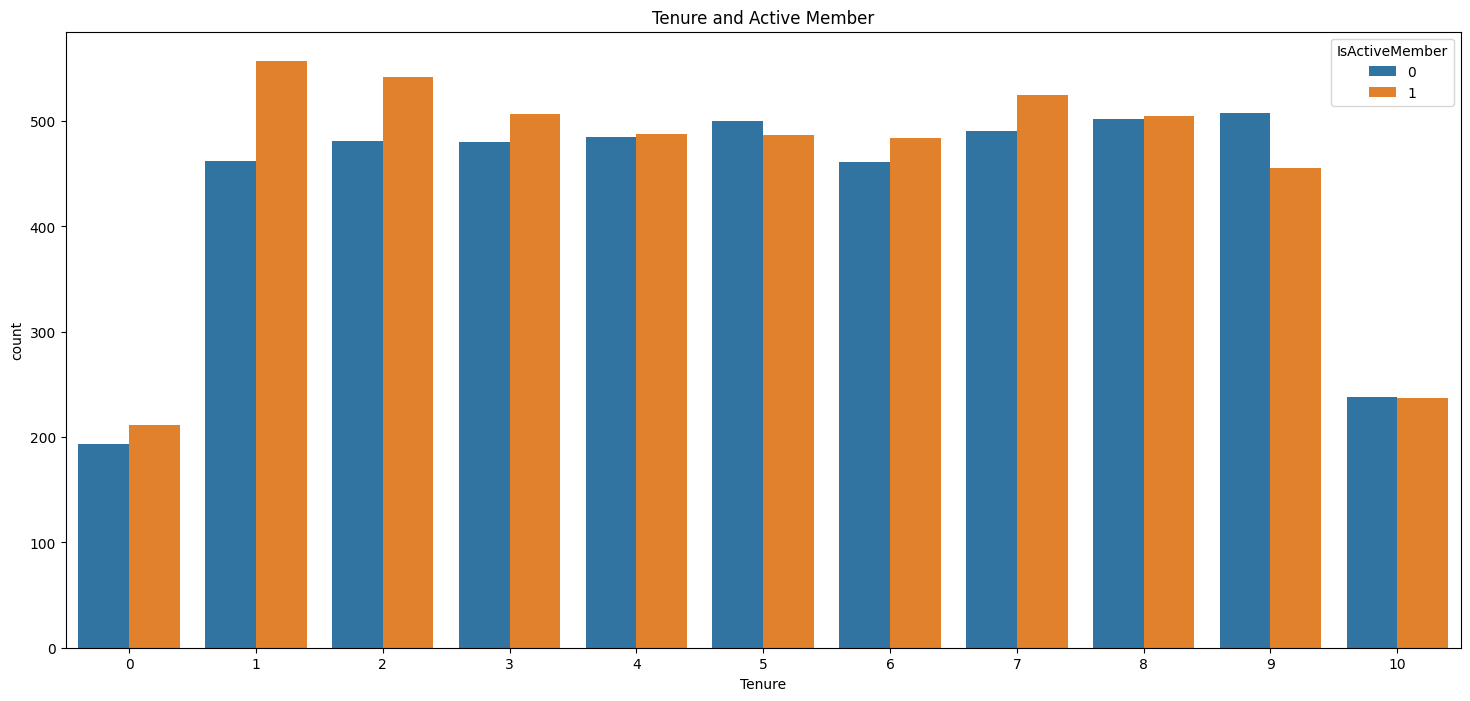

In [28]:
f,ax=plt.subplots(figsize=(18,8))

sns.countplot(data=cleaned_df,x='Tenure',hue='IsActiveMember')
ax.set_title('Tenure and Active Member')
ax.set_ylabel('count');

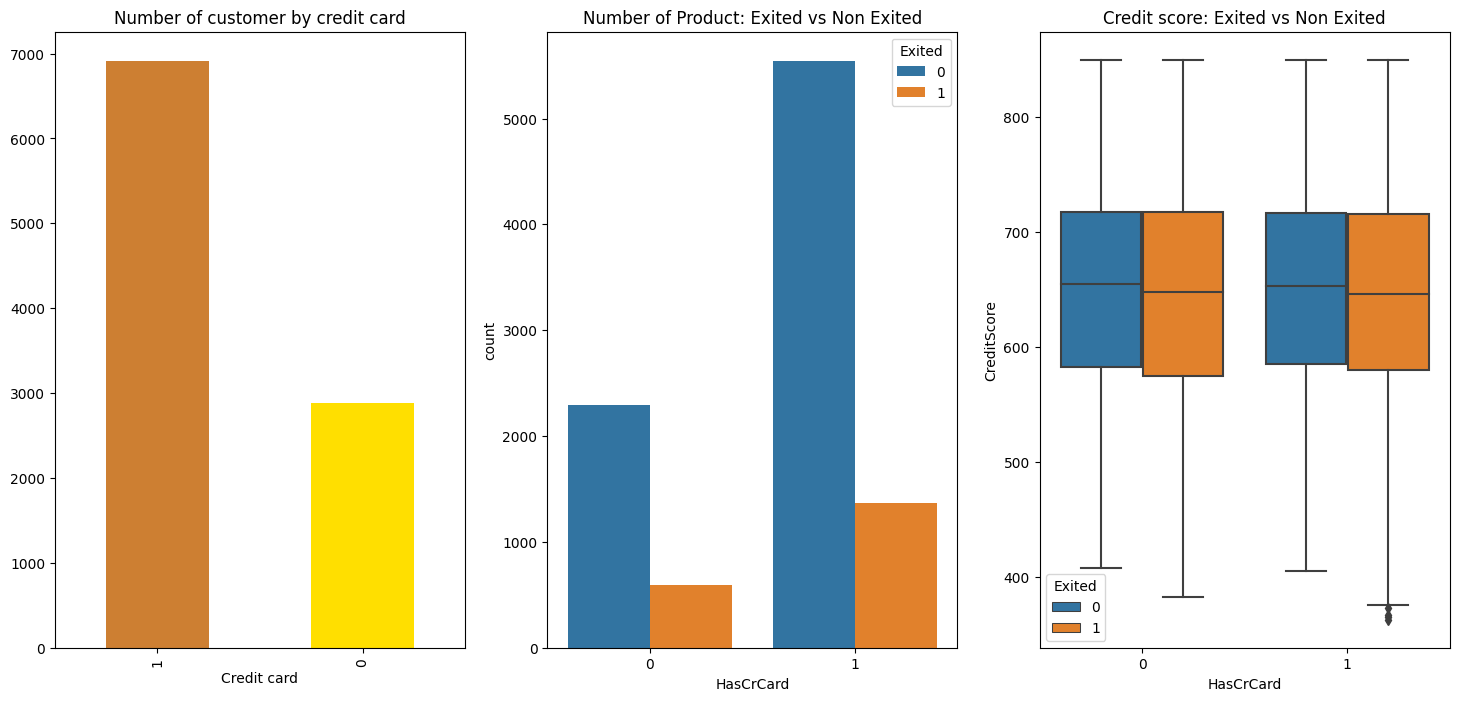

In [29]:
f,ax = plt.subplots(1,3,figsize=(18,8))
cleaned_df['HasCrCard'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of customer by credit card')
ax[0].set_xlabel('Credit card')

sns.countplot(data=cleaned_df,x='HasCrCard',hue='Exited',ax=ax[1])
ax[1].set_title('Number of Product: Exited vs Non Exited')
ax[1].set_ylabel('count');

sns.boxplot(data=cleaned_df,y='CreditScore',x='HasCrCard',hue='Exited',ax=ax[2])
ax[2].set_title('Credit score: Exited vs Non Exited');

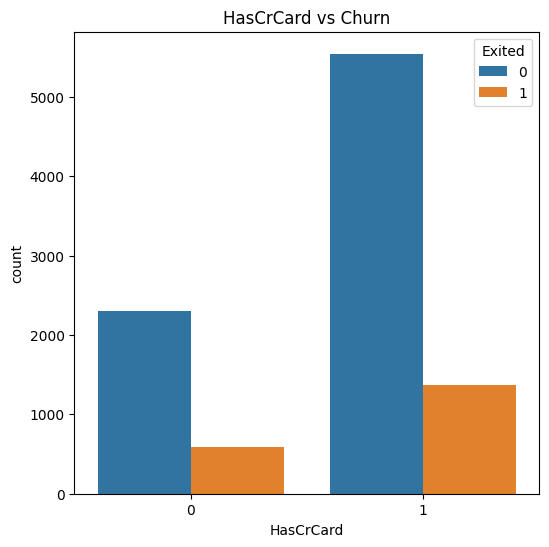

In [30]:
plt.figure(figsize=(6, 6))
sns.countplot(data=cleaned_df, x="HasCrCard", hue="Exited")
plt.title("HasCrCard vs Churn")
plt.show()

**Min-Max Scaling (Normalization):**

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore



numeric_cols = churn.select_dtypes(include=[np.number])


zscore_df = numeric_cols.apply(zscore)

outlier_mask = (zscore_df > 3) | (zscore_df < -3)

outlier_rows = np.any(outlier_mask, axis=1)

cleaned_df = churn[~outlier_rows]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_df[numeric_cols.columns])

scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols.columns)

final_df = pd.concat([scaled_df, cleaned_df.select_dtypes(include=['object'])], axis=1)

print(final_df)


      CustomerId  CreditScore       Age  Tenure   Balance  NumOfProducts  \
0       0.275616     0.525667  0.461538     0.2  0.000000            0.0   
1       0.326454     0.503080  0.442308     0.1  0.334031            0.0   
2       0.214421     0.285421  0.461538     0.8  0.636357            1.0   
3       0.542636     0.689938  0.403846     0.1  0.000000            0.5   
4       0.688778     1.000000  0.480769     0.2  0.500246            0.0   
...          ...          ...       ...     ...       ...            ...   
9995         NaN          NaN       NaN     NaN       NaN            NaN   
9996         NaN          NaN       NaN     NaN       NaN            NaN   
9997         NaN          NaN       NaN     NaN       NaN            NaN   
9998         NaN          NaN       NaN     NaN       NaN            NaN   
9999         NaN          NaN       NaN     NaN       NaN            NaN   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender  
0           1.0     

**Standardization (Z-score normalization):**

In [32]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_z = scaler.fit_transform(cleaned_df[numeric_cols.columns])


**Principal Component Analysis**

In [33]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

n_components = 2
pca = PCA(n_components=n_components)


pca_result = pca.fit_transform(scaled_data)


print(pca_result.shape)


(9799, 2)


**Binning Age into 6 discrete groups**

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

X_age = churn[['Age']]


n_bins = 6
strategy = 'uniform'
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)


X_age_binned = bin_encoder.fit_transform(X_age)


binned_df = pd.DataFrame(X_age_binned, columns=['Age_bin'])


churn_binned = pd.concat([churn, binned_df], axis=1)

print(churn_binned.head())


   CustomerId  CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
0    15634602          619  Female   42       2       0.00              1   
1    15647311          608  Female   41       1   83807.86              1   
2    15619304          502  Female   42       8  159660.80              3   
3    15701354          699  Female   39       1       0.00              2   
4    15737888          850  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Age_bin  
0          1               1        101348.88       1      1.0  
1          0               1        112542.58       0      1.0  
2          1               0        113931.57       1      1.0  
3          0               0         93826.63       0      1.0  
4          1               1         79084.10       0      2.0  


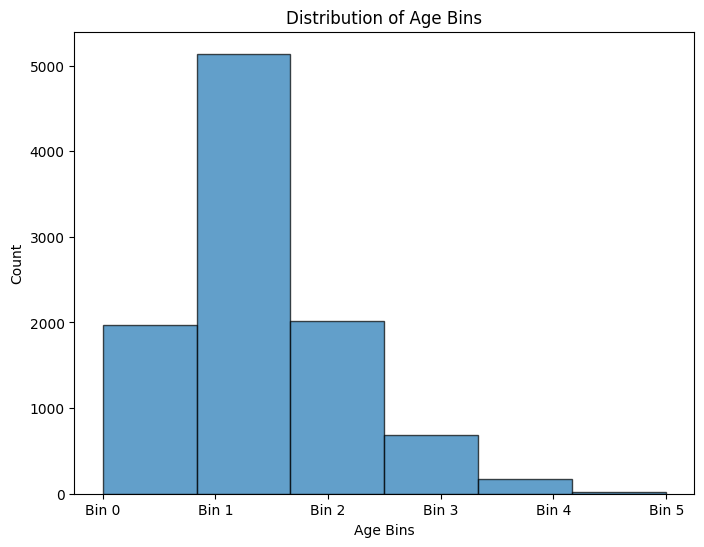

In [35]:

plt.figure(figsize=(8, 6))
plt.hist(churn_binned['Age_bin'], bins=n_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Distribution of Age Bins')
plt.xticks(range(n_bins), [f'Bin {i}' for i in range(n_bins)])
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
for col in ['Gender']:
  le=LabelEncoder()
  cleaned_df[col]=le.fit_transform(cleaned_df[col])


<ipython-input-42-592833e2dd7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col]=le.fit_transform(cleaned_df[col])


In [46]:
from sklearn.feature_selection import chi2
X=cleaned_df.drop(columns=['Exited'])
Y=cleaned_df['Exited']

<Axes: >

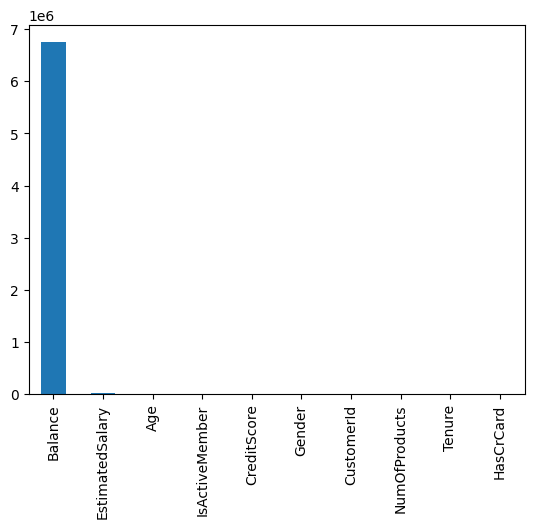

In [45]:
chi_scores=chi2(X,Y)
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

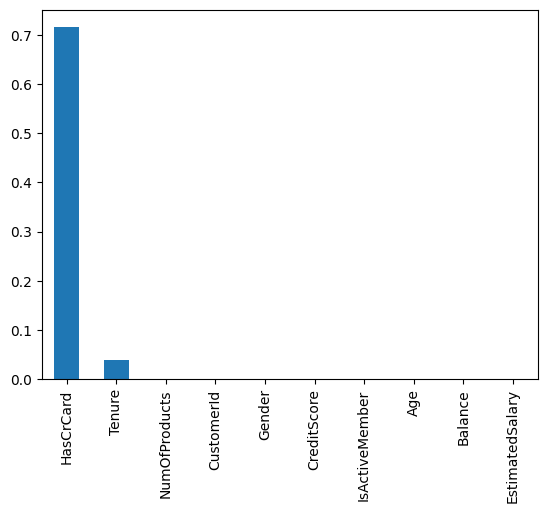

In [44]:
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()